In [1]:
# Warmup 0: We've seen these before!
import pandas as pd
import requests
import csv
import os

# AutomateTheBoringStuff
def process_csv(filename):
    file = open(filename, encoding="utf-8")  
    reader = csv.reader(file) 
    data = list(reader)        
    file.close()  
    return data

In [2]:
# Warmup 1: Gather data on the class "STATS_302"
url = "https://coletnelson.us/cs220-api/classes/STATS_302"
r = requests.get(url)
r.raise_for_status()
course_data = r.json()
course_data.keys() # too much data? use course_data.keys()

dict_keys(['credits', 'description', 'keywords', 'name', 'number', 'requisites', 'sections', 'subject'])

In [3]:
# Warmup 2: Turn your code into a function so that we can get
#           the course info for any course.
def get_course_info(course_name):
    url = "https://coletnelson.us/cs220-api/classes/" + course_name
    r = requests.get(url)
    r.raise_for_status()
    course_data = r.json()
    return course_data
get_course_info("COMPSCI_300")

{'credits': 3,
 'description': 'Introduces students to Object-Oriented Programming using classes and objects to solve more complex problems. Introduces array-based and linked data structures: including lists, stacks, and queues. Programming assignments require writing and developing multi-class (file) programs using interfaces, generics, and exception handling to solve challenging real world problems. Topics reviewed include reading/writing data and objects from/to files and exception handling, and command line arguments. Topics introduced: object-oriented design; class vs. object; create and define interfaces and iterators; searching and sorting; abstract data types (List,Stack,Queue,PriorityQueue(Heap),Binary Search Tree); generic interfaces (parametric polymorphism); how to design and write test methods and classes; array based vs. linked node implementations; introduction to complexity analysis; recursion.',
 'keywords': ['computer', 'science', 'programming', 'java'],
 'name': 'Pro

In [4]:
# Warmup 3: If that course doesn't exist, return None rather than
#           throwing an error.
def get_course_info(course_name):
    try:
        url = "https://coletnelson.us/cs220-api/classes/" + course_name
        r = requests.get(url)
        r.raise_for_status()
        course_data = r.json()
        return course_data
    except requests.HTTPError as e:
        print("Course not found!")
        return None
get_course_info("AG_101")

Course not found!


In [5]:
# Warmup 4: How many sections does COMPSCI_200 have?
compsci_200 = get_course_info("COMPSCI_200")
len(compsci_200["sections"])

4

In [6]:
# Warmup 5: How many subsections does COMPSCI_200 have?
num_subsections = 0
for compsci_200_section in compsci_200["sections"]:
    num_subsections += len(compsci_200_section["subsections"])
num_subsections

17

# Lecture 30: Web 2 - Generating HTML

Learning Objectives:

- Type by hand a basic HTML page with a list, a link, and a table
- Convert a Python list into an HTML unordered list
- Convert a Python dictionary of URLs into an HTML of hyperlinks
- Convert a Pandas DataFrame into an HTML table

### Part A: Type by hand a basic HTML page with a list, a link, and a table

Markdown and Jupyter Notebook will recognize HTML tags.

`esc` -> `m`

Otherwise, "Cell" -> "Cell Type" -> "Markdown"

### Practice the following tags in the cell below: 
 - h#
 - p
 - i
 - b
 - br
 - img

<i>Make a new Jupyter Notebook text file in this directory.</i>
<p> The head, body, and html tags are not necessary 
for a browser to read a file.</p>

<h2> Happy Friday!! </h2>

<p>It's going to be a <b>fun</b> day <br><br><br></p>

<p>Note that br does not have a close tag<p>
    
<img src="https://www.python.org/static/img/python-logo@2x.png">

### Hyperlink tags have an anchor tag and a href attribute
`a`: anchor

`href=` : hyper references 

Andy's favorite restaurant on campus is 
<a href="https://shortstackeats.com/">Short Stack Eatery</a>

### Unordered List Tags
`ul` : starts an unordered list

`li` : add a list item
Un-ordered list example:

<h6>Favorite Campus Buildings</h6>
<ul>
    <li>WIDS</li>
    <li>Education</li>
    <li>The Nick</li>
</ul>

### HTML Table Tags

`table`: start and end of a table

`tr`: start and end of a new row

`th`: a cell in the top row ... is bold

`td`: a cell inside a row

Add a few rows to the table below:

<table>
  <tr>
    <th>State</th>
    <th>Capital City</th>
  </tr>
  <tr>
    <td>Wisconsin</td>
    <td>Madison</td>
  </tr>
  <tr>
    <td>Indiana</td>
    <td>Indianapolis</td>
  </tr>
   <tr>
    <td>Illinois</td>
    <td>Springfield</td>
  </tr>
</table>

### Part B: Convert a Python list into an HTML unordered list

Given:  

`health_tips = ["Eat Healthy", "Exercise", "Relax", "Sleep"]`
    
Convert this Python list into a HTML ordered list:

<ul>
    <li>Eat Healthy</li>      
       <li>Exercise</li>
  <li>Relax</li>
       <li>Sleep</li>
</ul> 

In [7]:
def list_to_html(my_list, path):
    # print(path)
    # open the file for writing
    f = open(path, "w")
    
    # write the <ul> and \n
    f.write("<ul>\n")
    
    # write each item in the list with a \n after each </li>
    for item in my_list:
        f.write("<li>" + item + "</li>\n")

    # write the </ul> and \n
    f.write("</ul>\n")
    
    # close the file
    f.close()
    
todo_list = ["Eat Healthy", "Exercise", "Relax", "Sleep"]
list_to_html(todo_list, "todolist.html")

# Check that you made your document!

### Part C. Convert a Dictionary of Web Site Name, URL into a HTML page of hyperlinks

In [8]:
fav_sites = {
    "National Weather Service": "http://weather.gov",
    "Short Stack Eatery": "https://shortstackeats.com/",
}

In [9]:
# Turn fav_sites into a string of many links!
html_string = ''
for key in fav_sites:
    html_string += '<a href="' + fav_sites[key] + '">' + key + '</a><br>\n'
print(html_string)
        

<a href="http://weather.gov">National Weather Service</a><br>
<a href="https://shortstackeats.com/">Short Stack Eatery</a><br>



Paste your code in the markdown cell below to test it!

<a href="http://weather.gov">National Weather Service</a><br><a href="https://shortstackeats.com/">Short Stack Eatery</a><br>

In [10]:
# Now that we know it works, open a file for writing and write the string to a file
f = open("mylinks.html", "w")
f.write(html_string)
f.close()

In [11]:
# Create your own html document using any of the below!
my_favorite_sports = ["running", "eating", "biking"]
my_favorite_color = "blanchedalmond"
good_numbers = [3, 7, 27, 98]

some_scores = {
    "Bob": 23,
    "Alice": 47,
    "Theresa": 12,
    "Daniel": 4,
    "Lincoln": 11,
    "Liz": 19
}

adoptable_cats = [
    "https://g.petango.com/photos/2627/ed886769-7076-411d-b96b-8ec265c341f5.jpg",
    "https://g.petango.com/photos/2627/cb1e90e0-1c10-471a-95d5-107a35156eae.jpg",
    "https://g.petango.com/photos/2627/fc87cde4-b761-4b99-9ea1-40df4e42de3c.jpg",
    "https://g.petango.com/photos/2627/2dfcb001-b211-4b98-b81f-0c63f43ae506.jpg"
]

adoptable_cats_with_names = [
    {"name": "furball", "imglink": "https://g.petango.com/photos/2627/ed886769-7076-411d-b96b-8ec265c341f5.jpg"},
    {"name": "leo", "imglink": "https://g.petango.com/photos/2627/cb1e90e0-1c10-471a-95d5-107a35156eae.jpg"},
    {"name": "peach", "imglink": "https://g.petango.com/photos/2627/fc87cde4-b761-4b99-9ea1-40df4e42de3c.jpg"},
    {"name": "freddy", "imglink": "https://g.petango.com/photos/2627/2dfcb001-b211-4b98-b81f-0c63f43ae506.jpg"}
]

In [12]:
f = open("cats.html", "w")
f.write('<h1>Adoptable Cats!</h1>')
for cat in adoptable_cats_with_names:
    f.write('<h2>{}</h2>\n'.format(cat["name"]))
    f.write('<img src="{}">\n'.format(cat["imglink"]))
f.close()

### Part D:  Convert a Pandas Data Frame into a HTML table
Is there an easy way to make a HTML table?

Yes, Pandas has a DataFrame method `.to_html()`


In [13]:
# Load from the new_movie_data.csv file into a dataframe called "movies"
movies = pd.read_csv("new_movie_data.csv")
movies

,Title,Genre,Director,Cast,Year,Runtime,Rating,Revenue
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,333.13
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael ...",2012,124,7.0,126.46M
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,138.12M
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,270.32
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,325.02
...,...,...,...,...,...,...,...,...
1063,Guardians of the Galaxy Vol. 2,"Action, Adventure, Comedy",James Gunn,"Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",2017,136,7.6,389.81
1064,Baby Driver,"Action, Crime, Drama",Edgar Wright,"Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...",2017,113,7.6,107.83
1065,Only the Brave,"Action, Biography, Drama",Joseph Kosinski,"Josh Brolin, Miles Teller, Jeff Bridges, Jenni...",2017,134,7.6,18.34
1066,Incredibles 2,"Animation, Action, Adventure",Brad Bird,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H...",2018,118,7.6,608.58


In [14]:
# Convert the movies DataFrame to html using .to_html()
movies_html = movies.to_html()
movies_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Title</th>\n      <th>Genre</th>\n      <th>Director</th>\n      <th>Cast</th>\n      <th>Year</th>\n      <th>Runtime</th>\n      <th>Rating</th>\n      <th>Revenue</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Guardians of the Galaxy</td>\n      <td>Action,Adventure,Sci-Fi</td>\n      <td>James Gunn</td>\n      <td>Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana</td>\n      <td>2014</td>\n      <td>121</td>\n      <td>8.1</td>\n      <td>333.13</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Prometheus</td>\n      <td>Adventure,Mystery,Sci-Fi</td>\n      <td>Ridley Scott</td>\n      <td>Noomi Rapace, Logan Marshall-Green, Michael         fassbender, Charlize Theron</td>\n      <td>2012</td>\n      <td>124</td>\n      <td>7.0</td>\n      <td>126.46M</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Split</td>\n      <td>Horr

In [15]:
# Write it to a file
f = open("movies_table.html", "w")
f.write(movies_html)
f.close()

### Demo: CSV File to Webpages

In [16]:
# Read in the reviews.csv file
amazon_csv = process_csv("reviews.csv")
header = amazon_csv[0]
reviews = amazon_csv[1:]
reviews[1]

['99904',
 'amazon power fast usb charger',
 'got this for my kindle 7 tablet . Does an excellent job charging the kindle fire 7 a lot faster than the one it came with the kindle fire',
 '5',
 'True',
 '2',
 '2016-06-03']

In [17]:
# Create the folder "data" if it does not already exist.
if not os.path.exists("data"):
    os.mkdir("data")

#### Example Review Page

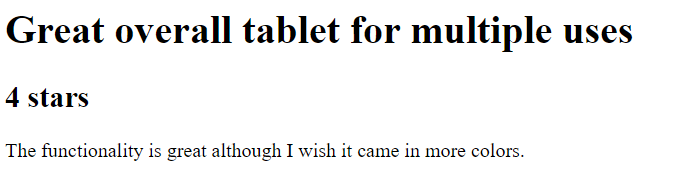

In [18]:
# Get the HTML data for a single review page
def get_amazon_review_html(review_data):
    review_id = review_data[0] # should use header.index for these!
    title = review_data[1]
    text = review_data[2]
    rating = review_data[3]
    
    html_review = ""
    html_review += "<h1>{}</h1>\n".format(title)
    html_review += "<h2>{} stars</h2>\n".format(rating)
    html_review += "<p>{}</p>\n".format(text)
    return html_review

In [19]:
# Use get_amazon_review_html to write to "my_review.html" for any random review
html_file = open("my_review.html", "w")
amazon_review_html = get_amazon_review_html(reviews[2])
html_file.write(amazon_review_html)
html_file.close()

In [20]:
# For each Amazon review, write to a file data/<id>.html ; e.g. data/3966.html.
for amazon_review in reviews:
    amazon_review_id = amazon_review[0] # should use header.index
    html_file = open(os.path.join("data", amazon_review_id + ".html"), "w")
    amazon_review_html = get_amazon_review_html(amazon_review)
    html_file.write(amazon_review_html)
    html_file.close()

#### Example Parent Page


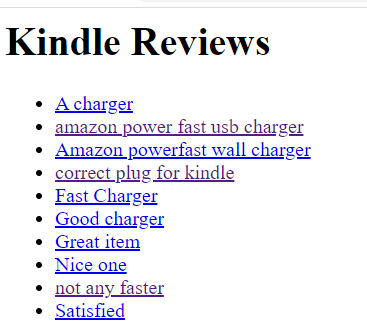

Hint: We can create a link to a child page by formatting the code...

`<li><a href = "{}">{}</a></li>\n`

In [21]:
# Create a parent page that is an unordered list with links to each review.
parent_html = ""
parent_html += "<h1>Kindle Reviews</h1>\n"
parent_html += "<ul>\n"
for amazon_review in reviews:
    amazon_review_id = amazon_review[0] # should use header.index for these
    amazon_review_title = amazon_review[1]
    
    path_to_review = os.path.join("data", amazon_review_id + ".html")
    review_link = '<li><a href = "{}">{}</a></li>\n'.format(path_to_review, amazon_review_title)
    parent_html += review_link
parent_html += "</ul>\n"

all_reviews_file = open("all_reviews.html", "w")
all_reviews_file.write(parent_html)
all_reviews_file.close()

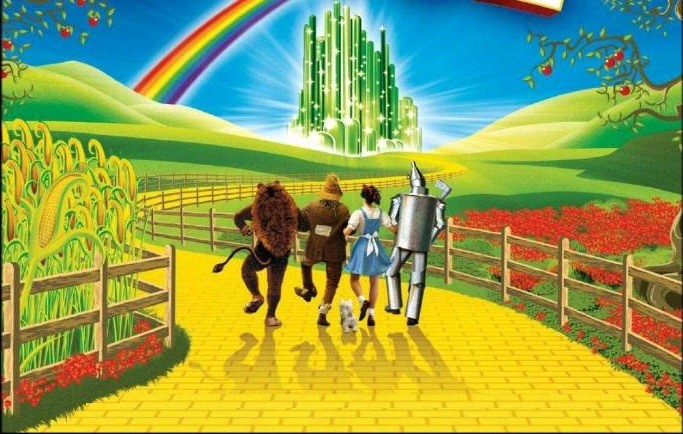

### Nefarious HTML Generation

It's a Friday! This is just a fun thought experiment. For this lecture, we have choosen the "happy path" for generating HTML. How could a nefarious actor abuse the code we made?

In [22]:
list_to_html(["hey", "hi", "<h3>hello world</h3>"], "oops1.html")

In [23]:
list_to_html(["hey", "hi", "<script>alert(0)</script>"], "oops2.html")

In [24]:
list_to_html(["hey", "hi", "<script>alert(localStorage.getItem('ssn') + '--> server')</script>"], "oops3.html")